In [197]:
import pandas as pd
import imblearn.over_sampling
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, ensemble
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [241]:
df = pd.read_csv('/Users/augustinebowe/Downloads/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [57]:
df.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [49]:
def yn(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [51]:
df.HeartDisease = df.HeartDisease.apply(yn)
df.HeartDisease.sum()

27373

In [66]:
df.HeartDisease.mean()

0.08559545959130067

In [52]:
df.Smoking = df.Smoking.apply(yn)
df.AlcoholDrinking = df.AlcoholDrinking.apply(yn)
df.Stroke = df.Stroke.apply(yn)
df.DiffWalking = df.DiffWalking.apply(yn)
df.Diabetic = df.Diabetic.apply(yn)
df.Asthma = df.Asthma.apply(yn)
df.KidneyDisease = df.KidneyDisease.apply(yn)
df.SkinCancer = df.SkinCancer.apply(yn)
df.PhysicalActivity = df.PhysicalActivity.apply(yn)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [55]:
dummy_df = pd.get_dummies(df, columns=['Sex','AgeCategory','Race','GenHealth'], drop_first=True)
dummy_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [60]:
X = dummy_df.drop(columns=['HeartDisease'])
y = dummy_df['HeartDisease']
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=42)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
Xr_tr = scaler.transform(X_train)
Xr_val = scaler.transform(X_val)

In [121]:
y_train.value_counts()

0    175491
1     16386
Name: HeartDisease, dtype: int64

# Logistic Regression

In [102]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(Xr_tr, y_train)
lr.score(Xr_val, y_val)

0.915727262777717

In [124]:
lrparams= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:1},{0:2,1:1},{0:3,1:1},{0:4,1:1}]}
lrgrid=GridSearchCV(estimator=lr, param_grid=lrparams, scoring='roc_auc',
                      n_jobs=-1, cv=3, verbose=3)
lr_pipe = Pipeline([('undersample', RandomUnderSampler(.2)),('classification', lrgrid)])
lr_pipe.fit(X_train, y_train)
lr_results = pd.DataFrame(lrgrid.cv_results_)

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Fitting 3 folds for each of 28 candidates, totalling 84 fits


/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [130]:
lr_results.sort_values(by='mean_test_score')
lr_best_params = lrgrid.best_params_
print(lr_best_params)
lr_best = LogisticRegression(C= 10 ,class_weight={0:1,1:1})
lr_best.fit(X_train, y_train)

{'C': 10.0, 'class_weight': {0: 1, 1: 1}}


/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, class_weight={0: 1, 1: 1})

Text(93.77777777777786, 0.5, 'actual')

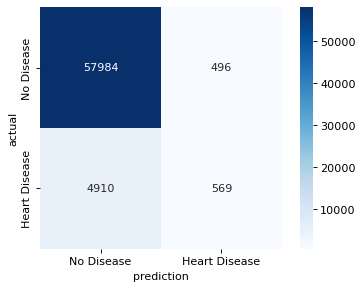

In [131]:
y_predict = (lr_best.predict_proba(X_val)[:, 1] >= .5)
lr_confusion = confusion_matrix(y_val, y_predict)
plt.figure(dpi=80)
sns.heatmap(lr_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
xticklabels=['No Disease', 'Heart Disease'],
yticklabels=['No Disease', 'Heart Disease']);
plt.xlabel('prediction')
plt.ylabel('actual')

ROC AUC score =  0.8365699503314358


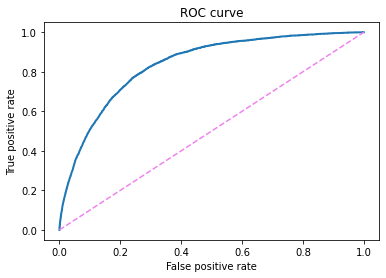

In [132]:
fpr, tpr, thresholds = roc_curve(y_val, lr_best.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_val, lr_best.predict_proba(X_val)[:,1]))

# Random Forest

In [119]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
undersampler = RandomUnderSampler()


In [176]:
rf = ensemble.RandomForestClassifier()
rf_params={"max_depth": range(20,31,5), "min_samples_leaf": range(5,20,5), 
         "n_estimators":[250,400],'class_weight':[{0:1,1:1},{0:2,1:1},{0:3,1:1},{0:4,1:1}]}
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, scoring='roc_auc',
                      n_jobs=-1, cv=3, verbose=3)
rf_pipe = Pipeline([('undersample', RandomUnderSampler(.2)),('classification', rf_grid)])
rf_pipe.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Pipeline(steps=[('undersample', RandomUnderSampler(sampling_strategy=0.2)),
                ('classification',
                 GridSearchCV(cv=3, estimator=RandomForestClassifier(),
                              n_jobs=-1,
                              param_grid={'class_weight': [{0: 1, 1: 1},
                                                           {0: 2, 1: 1},
                                                           {0: 3, 1: 1},
                                                           {0: 4, 1: 1}],
                                          'max_depth': range(20, 31, 5),
                                          'min_samples_leaf': range(5, 20, 5),
                                          'n_estimators': [250, 400]},
                              scoring='roc_auc', verbose=3))])

In [177]:
rf_results1 = pd.DataFrame(rf_grid.cv_results_)

In [178]:
rf_results1.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,29.953859,0.073281,3.219486,0.137240,"{0: 1, 1: 1}",30,10,400,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",0.841250,0.835704,0.842081,0.839678,0.002831,1
9,29.553884,0.128503,2.929462,0.024516,"{0: 1, 1: 1}",25,10,400,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 25...",0.841223,0.835493,0.842091,0.839602,0.002927,2
14,18.642142,0.033602,1.900908,0.006026,"{0: 1, 1: 1}",30,10,250,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",0.841129,0.835612,0.842057,0.839599,0.002845,3
17,28.928038,0.277052,2.837043,0.039065,"{0: 1, 1: 1}",30,15,400,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",0.841270,0.835546,0.841785,0.839534,0.002827,4
11,28.575650,0.418206,2.761297,0.019862,"{0: 1, 1: 1}",25,15,400,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 25...",0.841156,0.835415,0.842016,0.839529,0.002930,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,21.851505,0.227313,2.227419,0.036116,"{0: 4, 1: 1}",30,5,250,"{'class_weight': {0: 4, 1: 1}, 'max_depth': 30...",0.839331,0.833567,0.840034,0.837644,0.002897,68
36,19.067118,0.082930,1.941437,0.048745,"{0: 3, 1: 1}",20,5,250,"{'class_weight': {0: 3, 1: 1}, 'max_depth': 20...",0.839068,0.833435,0.840291,0.837598,0.002986,69
67,34.364037,0.418173,3.522598,0.032747,"{0: 4, 1: 1}",30,5,400,"{'class_weight': {0: 4, 1: 1}, 'max_depth': 30...",0.838984,0.833402,0.840349,0.837578,0.003005,70
55,30.691340,0.100171,3.106699,0.005785,"{0: 4, 1: 1}",20,5,400,"{'class_weight': {0: 4, 1: 1}, 'max_depth': 20...",0.839061,0.833303,0.840203,0.837522,0.003020,71


[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=5, n_estimators=250;, score=0.841 total time=  19.9s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=10, n_estimators=250;, score=0.841 total time=  18.9s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=10, n_estimators=250;, score=0.842 total time=  18.8s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=250;, score=0.841 total time=  18.6s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=250;, score=0.835 total time=  18.3s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=400;, score=0.841 total time=  29.6s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=5, n_estimators=400;, score=0.835 total time=  34.4s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=400;, score=0.841 total time=  32.5s
[C

[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=5, n_estimators=250;, score=0.835 total time=  19.9s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=5, n_estimators=400;, score=0.841 total time=  31.7s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=10, n_estimators=400;, score=0.842 total time=  30.2s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=400;, score=0.835 total time=  29.8s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=5, n_estimators=250;, score=0.841 total time=  21.7s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=250;, score=0.841 total time=  20.4s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=250;, score=0.835 total time=  20.0s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=400;, score=0.842 total time=  32.3s
[CV

In [137]:
rf_results = pd.DataFrame(rf_grid.cv_results_)

In [139]:
import pickle

In [141]:
with open('re_results.pkl', 'wb') as f:
    pickle.dump(rf_results, f)

In [144]:
rf_results.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
93,17.983416,0.115201,1.676293,0.008667,"{0: 1, 1: 1}",20,11,250,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 20...",0.838783,0.837803,0.840041,0.838876,0.000916,1
92,6.999992,0.041590,0.685319,0.007877,"{0: 1, 1: 1}",20,11,100,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 20...",0.838737,0.837728,0.840099,0.838855,0.000971,2
213,16.865624,0.019881,1.651179,0.001902,"{0: 2, 1: 1}",20,11,250,"{'class_weight': {0: 2, 1: 1}, 'max_depth': 20...",0.838452,0.837528,0.840014,0.838665,0.001026,3
212,7.563724,0.800800,0.692810,0.025229,"{0: 2, 1: 1}",20,11,100,"{'class_weight': {0: 2, 1: 1}, 'max_depth': 20...",0.838000,0.837243,0.840005,0.838416,0.001165,4
95,16.375859,0.025410,1.581277,0.026508,"{0: 1, 1: 1}",20,21,250,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 20...",0.838104,0.837112,0.840006,0.838407,0.001201,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,3.089572,0.186423,0.301467,0.008849,"{0: 3, 1: 1}",5,1,100,"{'class_weight': {0: 3, 1: 1}, 'max_depth': 5,...",0.812917,0.813107,0.814479,0.813501,0.000696,476
262,3.420247,0.164747,0.342001,0.007485,"{0: 3, 1: 1}",5,111,100,"{'class_weight': {0: 3, 1: 1}, 'max_depth': 5,...",0.812016,0.813345,0.814708,0.813356,0.001099,477
256,3.497000,0.473794,0.364669,0.052053,"{0: 3, 1: 1}",5,81,100,"{'class_weight': {0: 3, 1: 1}, 'max_depth': 5,...",0.813006,0.811813,0.814312,0.813044,0.001021,478
268,3.199829,0.155203,0.329550,0.023800,"{0: 3, 1: 1}",5,141,100,"{'class_weight': {0: 3, 1: 1}, 'max_depth': 5,...",0.811366,0.812290,0.815379,0.813012,0.001716,479


In [182]:
rf_best = ensemble.RandomForestClassifier(max_depth=30,
                                         min_samples_leaf = 10,
                                         n_estimators = 400
                                         )
rf_best.fit(X_train, y_train)


[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=5, n_estimators=250;, score=0.840 total time=  21.8s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=5, n_estimators=400;, score=0.839 total time=  34.3s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=10, n_estimators=400;, score=0.840 total time=  32.5s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=400;, score=0.840 total time=  32.1s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=5, n_estimators=250;, score=0.840 total time=  23.2s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=250;, score=0.840 total time=  22.2s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=250;, score=0.840 total time=  21.8s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=400;, score=0.841 total time=  34.9s
[CV

[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=5, n_estimators=250;, score=0.840 total time=  21.9s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=10, n_estimators=250;, score=0.840 total time=  20.6s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=10, n_estimators=250;, score=0.841 total time=  20.2s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=250;, score=0.839 total time=  20.1s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=250;, score=0.839 total time=  19.4s
[CV 3/3] END class_weight={0: 1, 1: 1}, max_depth=20, min_samples_leaf=15, n_estimators=400;, score=0.840 total time=  32.0s
[CV 2/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=5, n_estimators=400;, score=0.839 total time=  37.1s
[CV 1/3] END class_weight={0: 1, 1: 1}, max_depth=25, min_samples_leaf=10, n_estimators=400;, score=0.840 total time=  35.4s
[C

RandomForestClassifier(max_depth=30, min_samples_leaf=10, n_estimators=400)

ROC AUC score =  0.8365222835654802


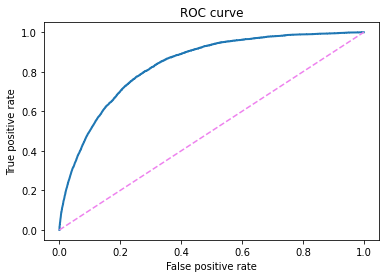

In [184]:
fpr, tpr, thresholds = roc_curve(y_val, rf_best.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_val, rf_best.predict_proba(X_val)[:,1]))

# Extra Trees

In [179]:
xt = ensemble.ExtraTreesClassifier()
xt_params={"max_depth": range(20,31,5), "min_samples_leaf": range(5,20,5), 
         "n_estimators":[250,400],'class_weight':[{0:1,1:1},{0:2,1:1},{0:3,1:1},{0:4,1:1}]}
xt_grid = GridSearchCV(estimator=xt, param_grid=xt_params, scoring='roc_auc',
                      n_jobs=-1, cv=3, verbose=3)
xt_pipe = Pipeline([('undersample', RandomUnderSampler(.2)),('classification', xt_grid)])
xt_pipe.fit(X_train, y_train)

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Fitting 3 folds for each of 72 candidates, totalling 216 fits


Pipeline(steps=[('undersample', RandomUnderSampler(sampling_strategy=0.2)),
                ('classification',
                 GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
                              param_grid={'class_weight': [{0: 1, 1: 1},
                                                           {0: 2, 1: 1},
                                                           {0: 3, 1: 1},
                                                           {0: 4, 1: 1}],
                                          'max_depth': range(20, 31, 5),
                                          'min_samples_leaf': range(5, 20, 5),
                                          'n_estimators': [250, 400]},
                              scoring='roc_auc', verbose=3))])

In [180]:
xt_results = pd.DataFrame(xt_grid.cv_results_)

In [181]:
xt_results.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,32.984671,0.131816,2.894939,0.025170,"{0: 1, 1: 1}",30,10,400,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",0.840477,0.839760,0.840881,0.840373,0.000464,1
14,20.798245,0.344721,1.837815,0.017407,"{0: 1, 1: 1}",30,10,250,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",0.840537,0.839561,0.840883,0.840327,0.000560,2
9,32.360911,0.187481,2.789741,0.012337,"{0: 1, 1: 1}",25,10,400,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 25...",0.840381,0.839627,0.840898,0.840302,0.000522,3
16,19.792447,0.164518,1.722094,0.020575,"{0: 1, 1: 1}",30,15,250,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",0.840306,0.839749,0.840826,0.840294,0.000440,4
33,34.495164,0.328563,3.014766,0.009266,"{0: 2, 1: 1}",30,10,400,"{'class_weight': {0: 2, 1: 1}, 'max_depth': 30...",0.840338,0.839556,0.840960,0.840285,0.000575,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,37.511784,0.224194,3.483137,0.116836,"{0: 4, 1: 1}",25,5,400,"{'class_weight': {0: 4, 1: 1}, 'max_depth': 25...",0.838918,0.838722,0.839825,0.839155,0.000481,68
60,23.358353,0.133225,2.153172,0.037509,"{0: 4, 1: 1}",25,5,250,"{'class_weight': {0: 4, 1: 1}, 'max_depth': 25...",0.838923,0.838479,0.839948,0.839117,0.000615,69
37,33.768442,0.200164,3.024577,0.064512,"{0: 3, 1: 1}",20,5,400,"{'class_weight': {0: 3, 1: 1}, 'max_depth': 20...",0.838892,0.838662,0.839737,0.839097,0.000462,70
55,34.548608,0.136571,3.083581,0.007601,"{0: 4, 1: 1}",20,5,400,"{'class_weight': {0: 4, 1: 1}, 'max_depth': 20...",0.838840,0.838564,0.839813,0.839072,0.000536,71


In [186]:
xt_best = ensemble.ExtraTreesClassifier(max_depth=30,
                                         min_samples_leaf = 10,
                                         n_estimators = 400
                                         )
xt_best.fit(X_train, y_train)



ExtraTreesClassifier(max_depth=30, min_samples_leaf=10, n_estimators=400)

ROC AUC score =  0.8373805568781586


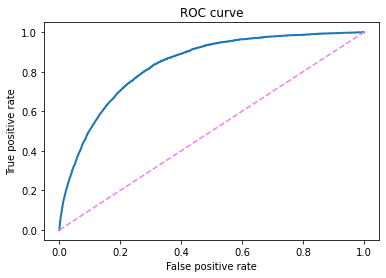

In [187]:
fpr, tpr, thresholds = roc_curve(y_val, xt_best.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_val, xt_best.predict_proba(X_val)[:,1]))

# Stacking

In [188]:
models= [lr_best, rf_best, xt_best]

model_tups=[]
for m in models:
    model_tups.append((str(m),m))

stack = ensemble.StackingClassifier(model_tups, final_estimator=LogisticRegression(),n_jobs=-1)
undersampler = RandomUnderSampler(0.2,random_state=26)
X_res, y_res = undersampler.fit_resample(X_train, y_train)
stack.fit(X_res, y_res)
probas=stack.predict_proba(X_val)[:,1]
print(roc_auc_score(y_val,probas))

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase

0.8392592229402702


# XGBoost

In [163]:
from xgboost import XGBClassifier

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [242]:
XGB = XGBClassifier(objective= 'binary:logistic')
xgb_params = {
    'max_depth': range (4, 12, 2),
    'n_estimators': [400],
    'learning_rate': [0.1, 0.01, 0.05]}
xgb_grid = GridSearchCV(estimator=XGB, param_grid=xgb_params,
    scoring = 'roc_auc', n_jobs = -1, cv = 3, verbose=True)
xgb_pipe = Pipeline([('undersample', RandomUnderSampler(.2)),('classification', xgb_grid)])
xgb_pipe.fit(X_train, y_train)

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed fr

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ...,

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dt

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dt

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dt

[21:18:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('undersample', RandomUnderSampler(sampling_strategy=0.2)),
                ('classification',
                 GridSearchCV(cv=3,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max...
                            

In [243]:
xgb_results = pd.DataFrame(xgb_grid.cv_results_)
xgb_results.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,55.013940,3.023834,0.157661,0.015835,0.05,4,400,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.841233,0.842205,0.840103,0.841180,0.000859,1
0,73.376398,0.321561,0.406527,0.110038,0.1,4,400,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.840190,0.841222,0.839620,0.840344,0.000663,2
9,102.684111,3.483276,0.331079,0.088243,0.05,6,400,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",0.839669,0.840347,0.838588,0.839535,0.000724,3
6,159.429706,7.599326,0.677461,0.298965,0.01,8,400,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.837890,0.841524,0.837513,0.838976,0.001809,4
5,111.873519,0.442071,0.345741,0.009530,0.01,6,400,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.837850,0.840966,0.836831,0.838549,0.001759,5
7,239.536689,10.725094,0.604303,0.037801,0.01,10,400,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.836411,0.839589,0.835367,0.837123,0.001796,6
10,150.729592,0.853073,0.435883,0.031671,0.05,8,400,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...",0.835526,0.837065,0.833933,0.835508,0.001279,7
1,110.502750,5.103701,0.452948,0.055122,0.1,6,400,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.834852,0.836513,0.834234,0.835200,0.000962,8
4,63.459127,0.733255,0.255823,0.055036,0.01,4,400,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.833749,0.836904,0.833921,0.834858,0.001448,9
11,146.017096,23.736397,0.383945,0.071339,0.05,10,400,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.830235,0.831854,0.828054,0.830048,0.001557,10


[20:57:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:05] WARNING: /Users/runner/miniforge3/cond

In [191]:
xgb_best = XGBClassifier(objective= 'binary:logistic',
                        learning_rate = 0.05,
                        max_depth = 4,
                        n_estimators = 400
                        )
xgb_best.fit(X_train, y_train)

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:46:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(93.77777777777786, 0.5, 'actual')

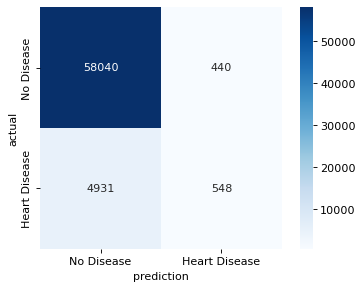

In [192]:
y_predict = (xgb_best.predict_proba(X_val)[:, 1] >= .5)
xgb_confusion = confusion_matrix(y_val, y_predict)
plt.figure(dpi=80)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
xticklabels=['No Disease', 'Heart Disease'],
yticklabels=['No Disease', 'Heart Disease']);
plt.xlabel('prediction')
plt.ylabel('actual')

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.8395390814424133


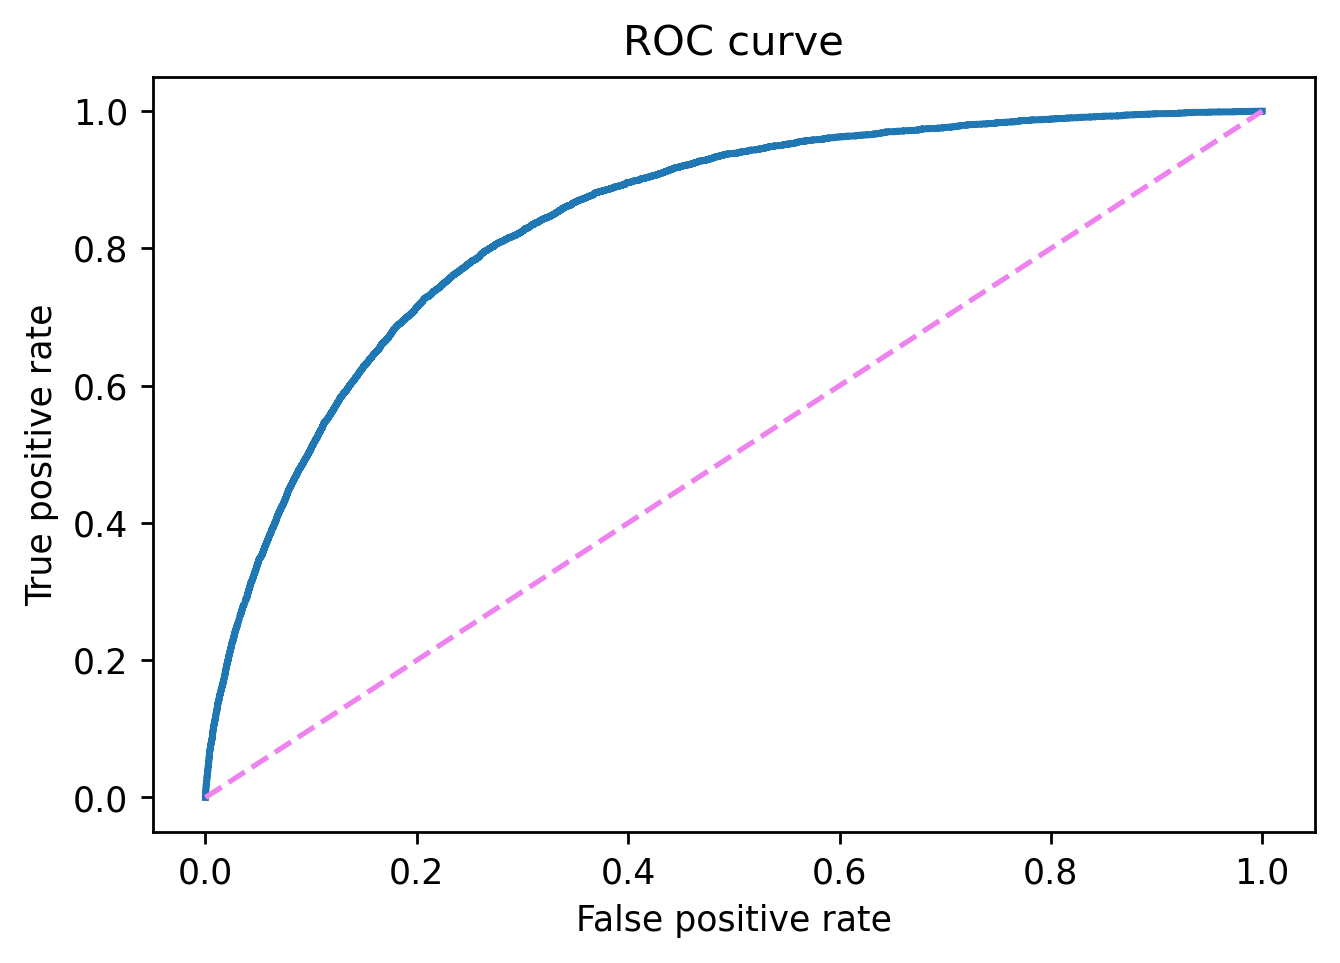

[20:57:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:00] WARNING: /Users/runner/miniforge3/cond

In [244]:
fpr, tpr, thresholds = roc_curve(y_val, xgb_best.predict_proba(X_val)[:,1])
plt.figure(dpi=250)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print(roc_auc_score(y_val, xgb_best.predict_proba(X_val)[:,1]))

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


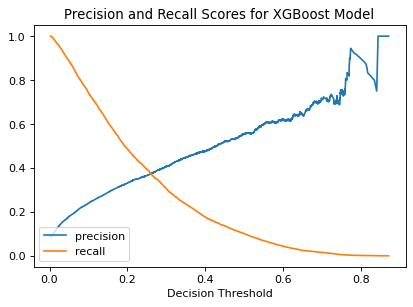

In [194]:

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, xgb_best.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Decision Threshold');
plt.title('Precision and Recall Scores for XGBoost Model');

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Text(0, 0.5, 'Model score')

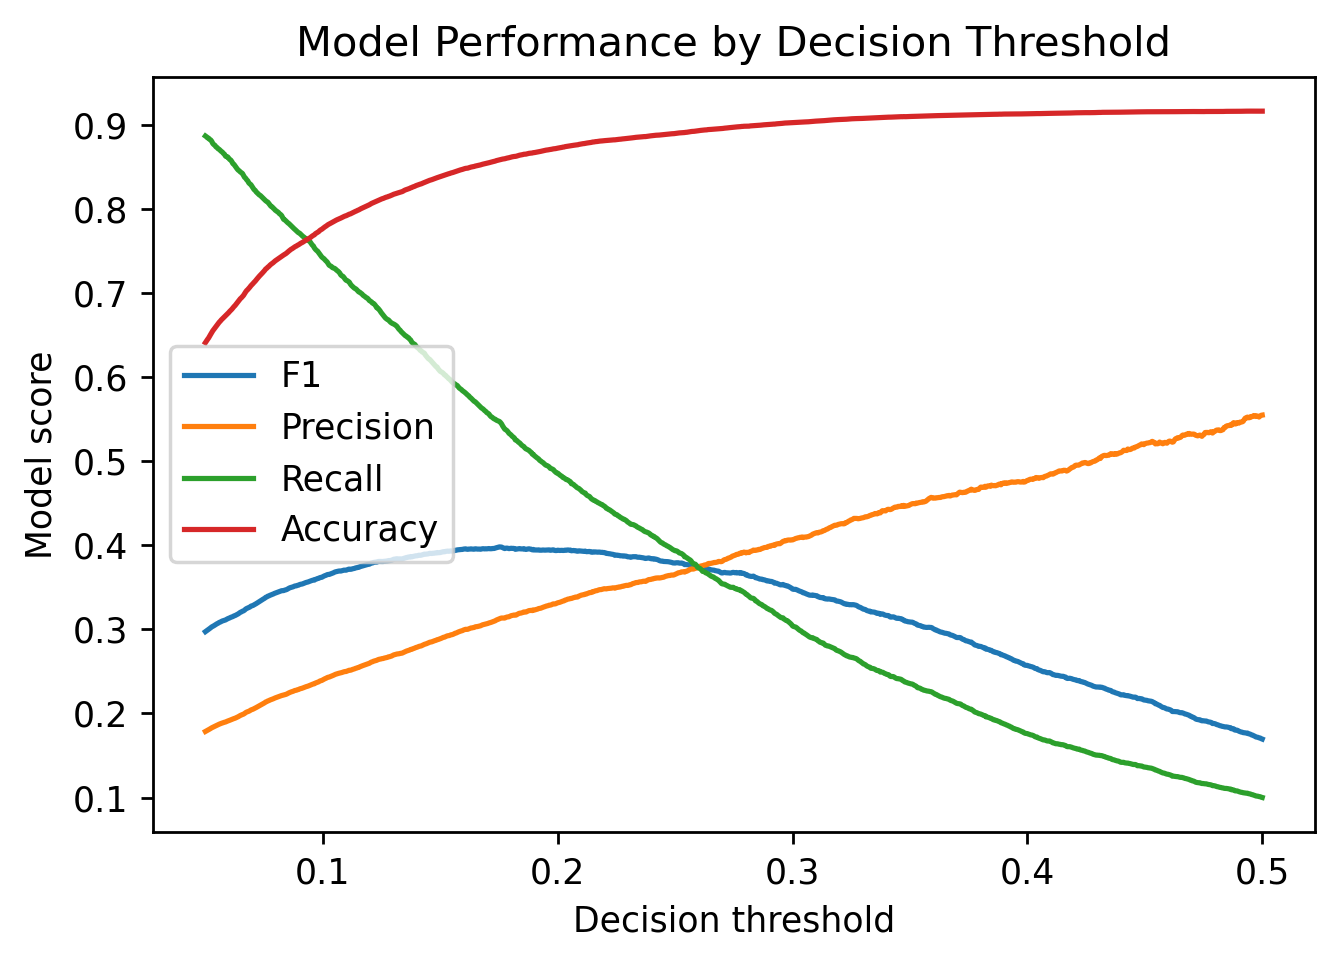

In [239]:


p_values = np.linspace(.05,.50,100)
xgb_probs = xgb_best.predict_proba(X_val)[:,1] 
f1_list = [] 
precision_list = []
recall_list = []
accuracy_list= []
for i in p_values:
    p_results = xgb_probs >= i
    accuracy_list.append(accuracy_score(y_val, p_results))
    precision_list.append(precision_score(y_val, p_results))
    recall_list.append(recall_score(y_val, p_results))
    f1_list.append(f1_score(y_val, p_results)) 
    
plt.figure(dpi=250)
plt.plot(p_values, accuracy_list)
plt.plot(p_values, precision_list)
plt.plot(p_values, recall_list)
plt.plot(p_values, f1)

plt.title('Model Performance by Decision Threshold')
plt.legend(['Accuracy','Precision','Recall','F1'])
plt.xlabel('Decision threshold')
plt.ylabel('Model score')



/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Text(184.5555555555557, 0.5, 'Actual')

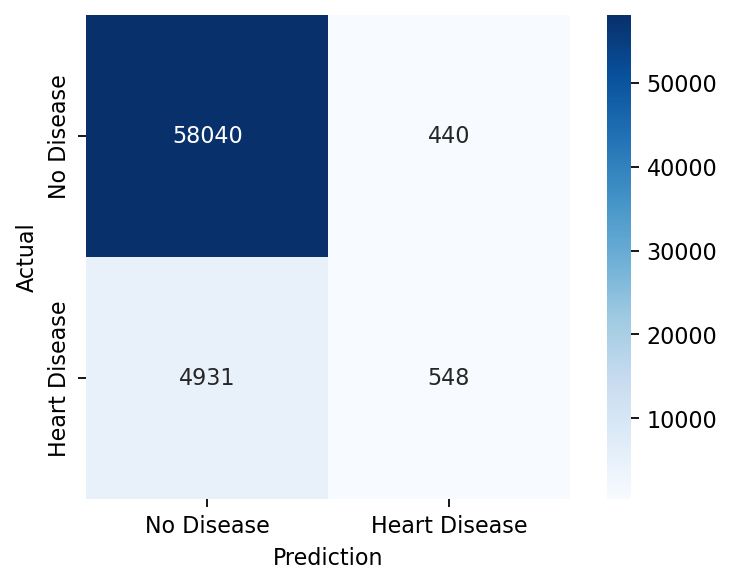

In [260]:
y_predict = (xgb_best.predict_proba(X_val)[:, 1] >= .5)
xgb_confusion = confusion_matrix(y_val, y_predict)
plt.figure(dpi=160)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
xticklabels=['No Disease', 'Heart Disease'],
yticklabels=['No Disease', 'Heart Disease']);
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [255]:
costs = []
for i in np.arange(0,.5,.01):
    probs = xgb_best.predict_proba(X_val)[:, 1] >= i
    cm =confusion_matrix(y_val, probs )
    costs.append(np.sum(cm*[[0,1],[10,0]]))

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarn

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarn

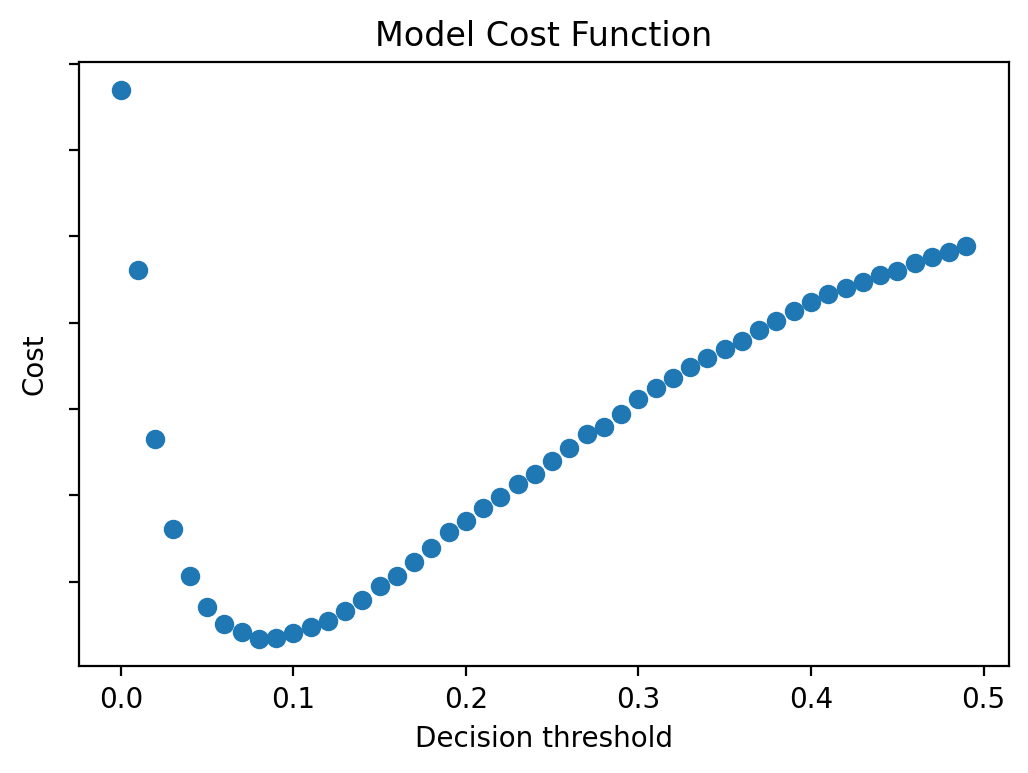

In [256]:
plt.figure(dpi=200)
plt.title('Model Cost Function')
plt.xlabel('Decision threshold')
plt.ylabel('Cost')
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
plt.scatter(np.arange(0,.5,.01),costs)

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Text(231.4444444444446, 0.5, 'actual')

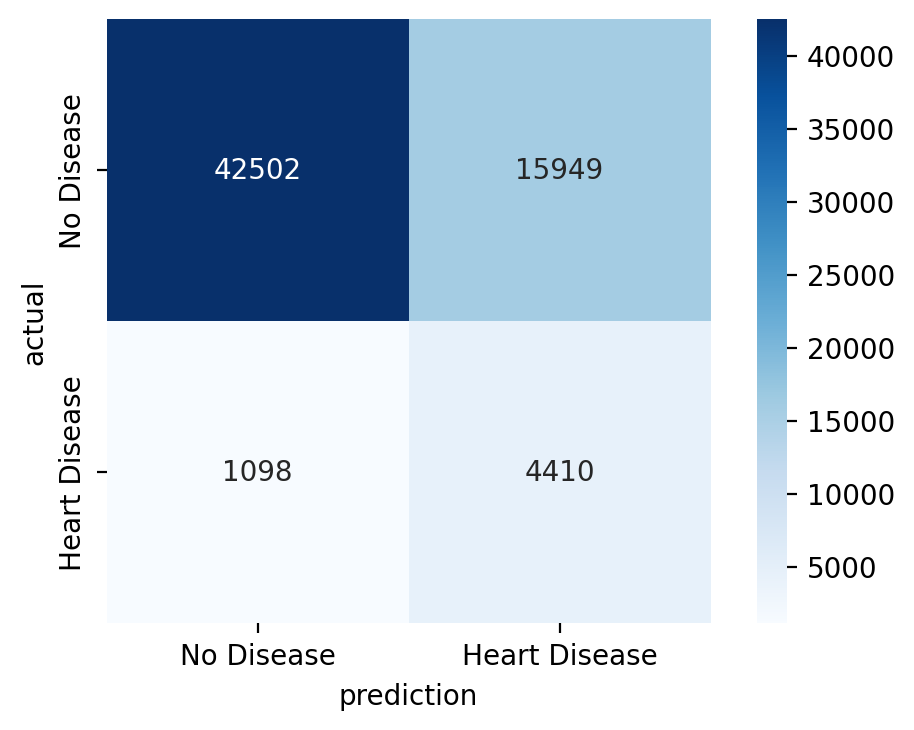

In [221]:
y_predict = (xgb_best.predict_proba(X_test)[:, 1] >= .08)
xgb_confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=200)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
xticklabels=['No Disease', 'Heart Disease'],
yticklabels=['No Disease', 'Heart Disease']);
plt.xlabel('prediction')
plt.ylabel('actual')

In [222]:
xgb_best.feature_importances_

array([0.00338343, 0.04656838, 0.00641546, 0.05610422, 0.01224656,
       0.00361373, 0.10765332, 0.07332823, 0.00244151, 0.00293073,
       0.0052176 , 0.03469975, 0.0209529 , 0.02920346, 0.04591537,
       0.05550468, 0.04097915, 0.03158687, 0.02692153, 0.0071672 ,
       0.00195393, 0.00700979, 0.02050049, 0.05255476, 0.04702131,
       0.06029674, 0.00301027, 0.00418029, 0.00275241, 0.00282416,
       0.01484013, 0.04989734, 0.04649219, 0.06298984, 0.01084237],
      dtype=float32)

In [224]:
importance_df=pd.DataFrame({'features':X_train.columns,'importance':xgb_best.feature_importances_})
importance_df.sort_values(by='importance',ascending=False)

,features,importance
6,DiffWalking,0.107653
7,Diabetic,0.073328
33,GenHealth_Poor,0.062990
25,AgeCategory_80 or older,0.060297
3,Stroke,0.056104
15,AgeCategory_30-34,0.055505
23,AgeCategory_70-74,0.052555
31,GenHealth_Fair,0.049897
24,AgeCategory_75-79,0.047021
1,Smoking,0.046568


/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


ROC AUC score =  0.8382605233387488


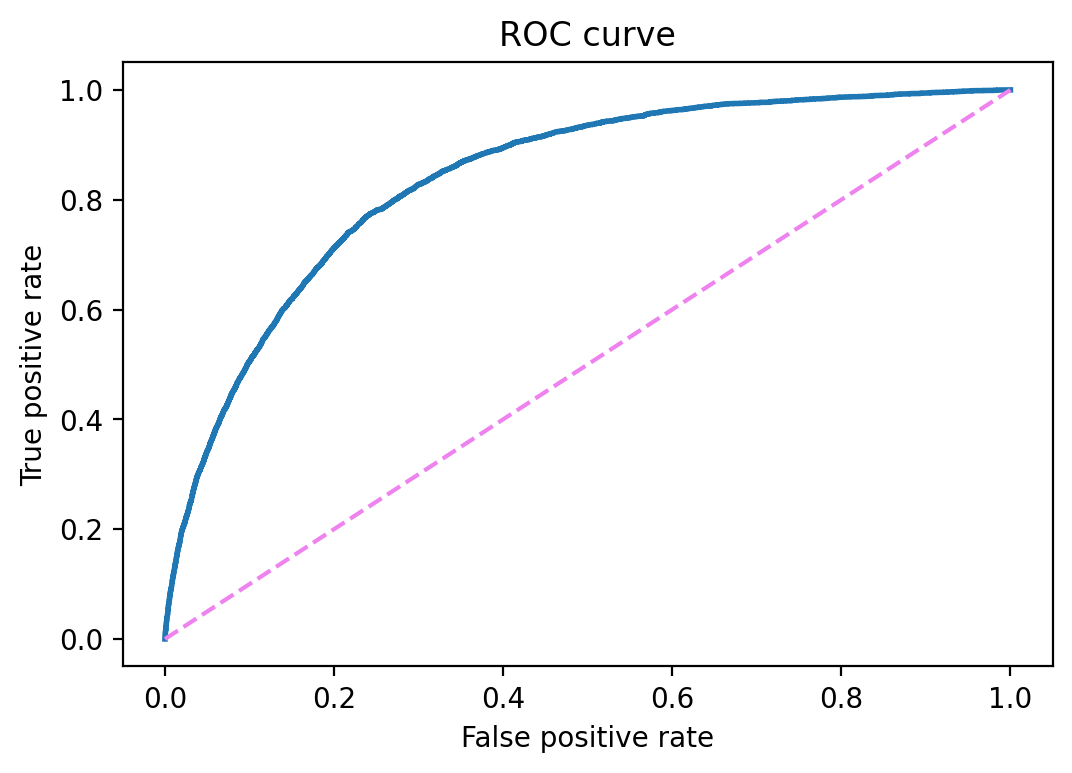

In [230]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_best.predict_proba(X_test)[:,1])
plt.figure(dpi=200)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:,1]))

In [231]:
final_predictions = (xgb_best.predict_proba(X_test)[:, 1] >= .08)
final_precision = precision_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)
final_accuracy = accuracy_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)
print(final_precision)
print(final_recall)
print(final_accuracy)
print(final_f1)

/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.21661181786924702
0.8006535947712419
0.7334698791413249
0.3409749874357289


/Applications/anaconda3/envs/metis/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


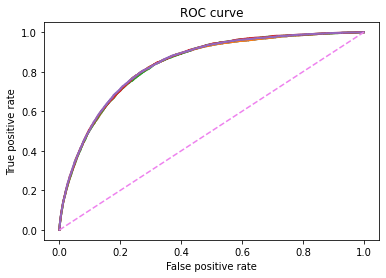

In [232]:
fpr, tpr, thresholds = roc_curve(y_val, lr_best.predict_proba(X_val)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_val, lr_best.predict_proba(X_val)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_val, xt_best.predict_proba(X_val)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_val, stack.predict_proba(X_val)[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_val, xgb_best.predict_proba(X_val)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot(fpr1, tpr1,lw=2)
plt.plot(fpr2, tpr2,lw=2)
plt.plot(fpr3, tpr3,lw=2)
plt.plot(fpr4, tpr4,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');